# 泰坦尼克生存预测


## 1、 数据加载

In [4]:
import pandas as pd 
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [6]:
data_all = pd.concat([data_train,data_test])

## 2、 数据探索

In [7]:
data_all.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
data_all.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [9]:
data_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data_all.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sadlier, Mr. Matthew",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data_train[data_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
data_test[data_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


### 探索各字段与生存结果的关系

#### Pclass

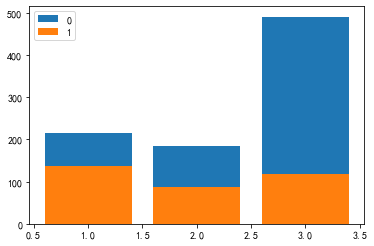

In [17]:
plt.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure()
ax = fig.add_subplot()

data_gb_pclass = data_train.groupby('Pclass')

ax.bar(x= data_gb_pclass.count().index,height=data_gb_pclass.count()['Survived'],label='0')
ax.bar(x= data_gb_pclass.count().index,height=data_gb_pclass.sum()['Survived'],label = '1')


plt.legend()
plt.show()

#### Sex

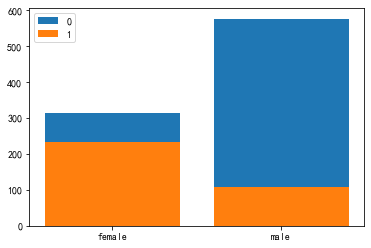

In [18]:
fig = plt.figure()
ax = fig.add_subplot()

data_gb_sex = data_train.groupby('Sex')

ax.bar(x= data_gb_sex.count().index,height=data_gb_sex.count()['Survived'],label='0')
ax.bar(x= data_gb_sex.count().index,height=data_gb_sex.sum()['Survived'],label = '1')


plt.legend()
plt.show()

女性的生存率比男性高

#### Age

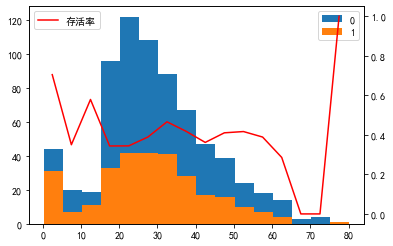

In [19]:
# fig = plt.figure()
# ax = fig.add_subplot()
fig,ax=plt.subplots()
# data_gb_age = data_train[~data_train['Age'].isnull()].groupby('Age')
# data_gb_age = data_train.groupby('Age')

data_train_1 = data_train.copy()
data_train_1['group'] = pd.cut(data_train_1['Age'].sort_values(),range(0,85,5),labels=[x+2.5 for x in range(0,80,5)])


ax1 = ax.twinx() 
ax.hist(x=data_train['Age'],
        bins= 16,
#         range=[0,data_train['Age'].max()],
        label = 0)
ax.hist(x=data_train[data_train['Survived']==1]['Age'],
        bins= 16,
#         range=[0,data_train['Age'].max()],
        label = 1)



d = data_train_1.groupby(['group'])['Survived'].sum()/data_train_1.groupby(['group'])['Survived'].count()
ax1.plot(d.index,
        d,label= '存活率',color = 'red')

ax.legend()
ax1.legend()

plt.show()

以年龄来看，小于5岁的孩子生存率非常高

#### SibSp Parch  兄弟姐妹和父母孩子数量

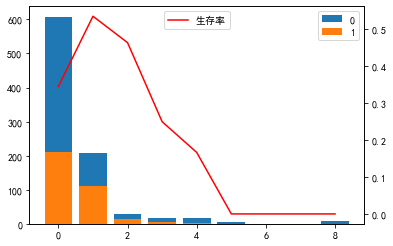

In [20]:
# fig = plt.figure()
# ax = fig.add_subplot()
fig,ax=plt.subplots()
# data_gb_age = data_train[~data_train['Age'].isnull()].groupby('Age')
data_gb_sibsp = data_train.groupby('SibSp')

ax1 = ax.twinx()
ax.bar(x=data_gb_sibsp.count().index,height=data_gb_sibsp.count()['Survived'],
        label = 0)
ax.bar(x=data_gb_sibsp.count().index,height=data_gb_sibsp.sum()['Survived'],
        label = 1)

ax1.plot(data_gb_sibsp.count().index,data_gb_sibsp.sum()['Survived']/data_gb_sibsp.count()['Survived'],color = 'red' ,label = '生存率')

ax.legend()
ax1.legend(loc='upper center')

plt.show()

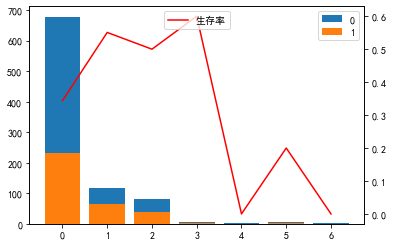

In [21]:
# fig = plt.figure()
# ax = fig.add_subplot()
fig,ax=plt.subplots()

data_gb_parch = data_train.groupby('Parch')

ax1 = ax.twinx()
ax.bar(x=data_gb_parch.count().index,height=data_gb_parch.count()['Survived'],
        label = 0)
ax.bar(x=data_gb_parch.count().index,height=data_gb_parch.sum()['Survived'],
        label = 1)

ax1.plot(data_gb_parch.count().index,data_gb_parch.sum()['Survived']/data_gb_parch.count()['Survived'],color = 'red' ,label = '生存率')

ax.legend()
ax1.legend(loc='upper center')

plt.show()

In [22]:
data_train['_family_numbers'] = data_train.SibSp + data_train.Parch
data_test['_family_numbers'] = data_test.SibSp + data_test.Parch

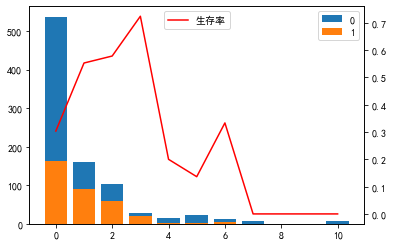

In [23]:
# fig = plt.figure()
# ax = fig.add_subplot()
fig,ax=plt.subplots()

data_gb_family_numbers = data_train.groupby('_family_numbers')

ax1 = ax.twinx()
ax.bar(x=data_gb_family_numbers.count().index,height=data_gb_family_numbers.count()['Survived'],
        label = 0)
ax.bar(x=data_gb_family_numbers.count().index,height=data_gb_family_numbers.sum()['Survived'],
        label = 1)

ax1.plot(data_gb_family_numbers.count().index,data_gb_family_numbers.sum()['Survived']/data_gb_family_numbers.count()['Survived'],color = 'red' ,label = '生存率')

ax.legend()
ax1.legend(loc='upper center')

plt.show()

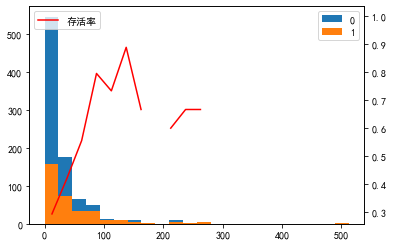

In [24]:

fig,ax=plt.subplots()

data_train_2 = data_train.copy()
data_train_2['group'] = pd.cut(data_train_2['Fare'].sort_values(),range(0,550,25),labels=[x+12.5 for x in range(0,525,25)])


ax1 = ax.twinx() 
ax.hist(x=data_train['Fare'],
        bins= 22,
        label = 0)
ax.hist(x=data_train[data_train['Survived']==1]['Fare'],
        bins= 22,
        label = 1)



d = data_train_2.groupby(['group'])['Survived'].sum()/data_train_2.groupby(['group'])['Survived'].count()
ax1.plot(d.index,
        d,label= '存活率',color = 'red')

ax.legend()
ax1.legend()

plt.show()

高价格船票的人存活率普遍比较高

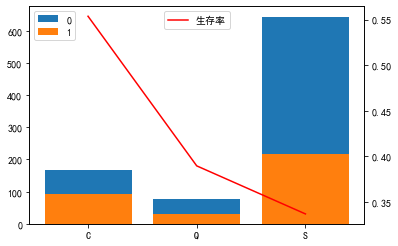

In [25]:

fig,ax=plt.subplots()

data_gb_embarked = data_train.groupby('Embarked')

ax1 = ax.twinx()
ax.bar(x=data_gb_embarked.count().index,height=data_gb_embarked.count()['Survived'],
        label = 0)
ax.bar(x=data_gb_embarked.count().index,height=data_gb_embarked.sum()['Survived'],
        label = 1)

ax1.plot(data_gb_embarked.count().index,data_gb_embarked.sum()['Survived']/data_gb_embarked.count()['Survived'],color = 'red' ,label = '生存率')

ax.legend()
ax1.legend(loc='upper center')

plt.show()

In [26]:
data_train['称谓'] = data_train.loc[:,'Name'].apply(lambda x : x.replace(' ','').split('.')[0].split(',')[-1])
data_test['称谓'] = data_test.loc[:,'Name'].apply(lambda x : x.replace(' ','').split('.')[0].split(',')[-1])

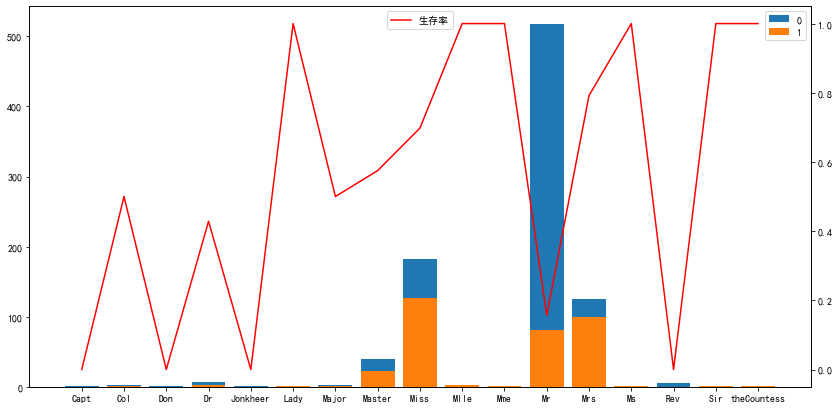

In [27]:

fig,ax=plt.subplots(figsize = (14,7))

data_gb_name = data_train.groupby('称谓')

ax1 = ax.twinx()
ax.bar(x=data_gb_name.count().index,height=data_gb_name.count()['Survived'],
        label = 0)
ax.bar(x=data_gb_name.count().index,height=data_gb_name.sum()['Survived'],
        label = 1)

ax1.plot(data_gb_name.count().index,data_gb_name.sum()['Survived']/data_gb_name.count()['Survived'],color = 'red' ,label = '生存率')

ax.legend()
ax1.legend(loc='upper center')

plt.show()

In [28]:
def return_name(name):
    if name in ['Mr', 'Mrs', 'Miss', 'Master']:
        return name
    elif name == 'Mme':
        return 'Mrs'
    elif name == 'Ms':
        return 'Mrs'
    elif name == 'Lady':
        return 'Miss'
    elif name == 'Sir':
        return 'Mr'
    elif name == 'Mlle':
        return 'Mrs'
    elif name == 'theCountess':
        return 'Mrs'
    else:
        return 'Other'
    

In [29]:
data_train['称谓'] = data_train['称谓'].apply(return_name)
data_test['称谓'] = data_test['称谓'].apply(return_name)

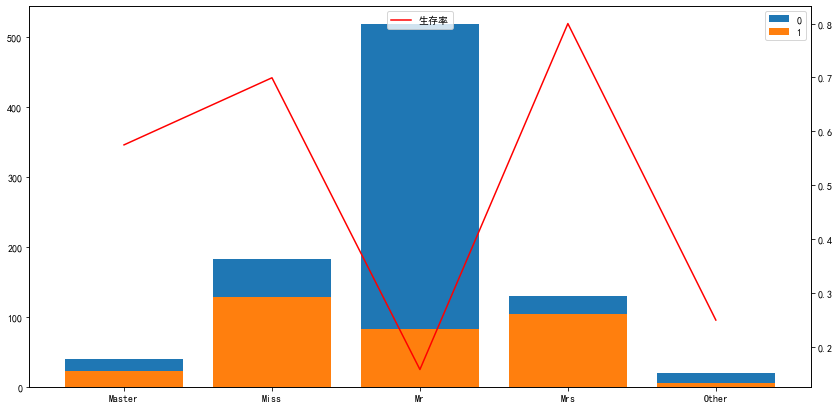

In [30]:

fig,ax=plt.subplots(figsize = (14,7))

data_gb_name = data_train.groupby('称谓')

ax1 = ax.twinx()
ax.bar(x=data_gb_name.count().index,height=data_gb_name.count()['Survived'],
        label = 0)
ax.bar(x=data_gb_name.count().index,height=data_gb_name.sum()['Survived'],
        label = 1)

ax1.plot(data_gb_name.count().index,data_gb_name.sum()['Survived']/data_gb_name.count()['Survived'],color = 'red' ,label = '生存率')

ax.legend()
ax1.legend(loc='upper center')


plt.show()

## 3、数据清洗

缺失字段有 3 个，Age 、 Fare 、 Embarked ，其中 Age 缺失数据最多，Fare 在测试集中缺失 1 条，Embarked 在训练集中缺失 2 条。

以平均值补充 Fare ,以最多值补充 Embarked 。

In [31]:
data_train_3 = data_train.copy()

data_train_3.Fare.fillna(data_train.Fare.mean(),inplace= True)
data_train_3.Embarked.fillna(data_train.groupby('Embarked')['Embarked'].count().sort_values().index[-1],inplace= True)

# data_train.Fare.mean()

In [32]:
data_test_3 = data_test.copy()

data_test_3.Fare.fillna(data_test.Fare.mean(),inplace= True)
data_test_3.Embarked.fillna(data_test.groupby('Embarked')['Embarked'].count().sort_values().index[-1],inplace= True)

# data_test.Fare.mean()

#### 3.1 以平均值补充 Age 。

In [33]:
data_train_3_1 = data_train_3.copy()

data_train_3_1.Age.fillna(data_train.Age.mean(),inplace= True)


In [34]:
data_test_3_1 = data_test_3.copy()

data_test_3_1.Age.fillna(data_test.Age.mean(),inplace= True)


#### 3.2按照 称谓 字段的各平均值补充各称谓的 Age 。

In [35]:
data_train_3_2 = data_train_3.copy()

# data_train_3_2.Age.fillna(data_train.Age.mean(),inplace= True)
for i in data_train_3_2.称谓.unique():
    print('称谓 {} 的平均年龄 {}'.format(i,data_train_3_2.loc[(data_train_3_2.称谓 == i),'Age'].mean()))
    data_train_3_2.loc[(data_train_3_2.称谓 == i),'Age'] = data_train_3_2.loc[(data_train_3_2.称谓 == i),'Age'].fillna(data_train_3_2.loc[(data_train_3_2.称谓 == i),'Age'].mean())

称谓 Mr 的平均年龄 32.409774436090224
称谓 Mrs 的平均年龄 35.48672566371681
称谓 Miss 的平均年龄 21.952380952380953
称谓 Master 的平均年龄 4.574166666666667
称谓 Other 的平均年龄 45.89473684210526


In [36]:
data_test_3_2 = data_test_3.copy()

# data_test_3_2.Age.fillna(data_test.Age.mean(),inplace= True)
for i in data_test_3_2.称谓.unique():
    print('称谓 {} 的平均年龄 {}'.format(i,data_test_3_2.loc[(data_test_3_2.称谓 == i),'Age'].mean()))
    data_test_3_2.loc[(data_test_3_2.称谓 == i),'Age'] = data_test_3_2.loc[(data_test_3_2.称谓 == i),'Age'].fillna(data_test_3_2.loc[(data_test_3_2.称谓 == i),'Age'].mean())

称谓 Mr 的平均年龄 32.0
称谓 Mrs 的平均年龄 38.903225806451616
称谓 Miss 的平均年龄 21.774843750000002
称谓 Master 的平均年龄 7.406470588235294
称谓 Other 的平均年龄 43.833333333333336


#### 筛选训练数据与生存结果列

In [37]:
train_label = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', '_family_numbers',
       '称谓']
train_survived = data_train_3['Survived']

对平均值补充 Age 训练数据(data_train_3_1)和按照 称谓 字段的各平均值补充各称谓的 Age 训练数据(data_train_3_2)进行one-hot处理

In [38]:
from sklearn.feature_extraction import DictVectorizer
dvec_3_1=DictVectorizer(sparse=False)
data_train_features_3_1=dvec_3_1.fit_transform(data_train_3_1[train_label].to_dict(orient='records'))


dvec_3_2=DictVectorizer(sparse=False)
data_train_features_3_2=dvec_3_2.fit_transform(data_train_3_2[train_label].to_dict(orient='records'))


训练集

data_train_features_scaler_3_1_1 平均值填充Age onehot+MinMax处理

data_train_features_scaler_3_2_1 按称谓平均值填充Age onehot+MinMax处理

data_train_features_scaler_3_1_2 平均值填充Age onehot+Z-score处理

data_train_features_scaler_3_2_2 按称谓平均值填充Age onehot+Z-score处理

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler_3_1_1 = MinMaxScaler()
data_train_features_scaler_3_1_1 = scaler_3_1_1.fit_transform(data_train_features_3_1)


scaler_3_2_1 = MinMaxScaler()
data_train_features_scaler_3_2_1 = scaler_3_2_1.fit_transform(data_train_features_3_2)

from sklearn.preprocessing import StandardScaler
scaler_3_1_2 = StandardScaler()
data_train_features_scaler_3_1_2 = scaler_3_1_2.fit_transform(data_train_features_3_1)

scaler_3_2_2 = StandardScaler()
data_train_features_scaler_3_2_2 = scaler_3_2_2.fit_transform(data_train_features_3_2)


测试集

data_test_features_scaler_3_1_1 平均值填充Age onehot+MinMax处理

data_test_features_scaler_3_2_1 按称谓平均值填充Age onehot+MinMax处理

data_test_features_scaler_3_1_2 平均值填充Age onehot+Z-score处理

data_test_features_scaler_3_2_2 按称谓平均值填充Age onehot+Z-score处理

In [40]:
from sklearn.feature_extraction import DictVectorizer
dvec_3_1=DictVectorizer(sparse=False)
data_test_features_3_1=dvec_3_1.fit_transform(data_test_3_1[train_label].to_dict(orient='records'))


dvec_3_2=DictVectorizer(sparse=False)
data_test_features_3_2=dvec_3_2.fit_transform(data_test_3_2[train_label].to_dict(orient='records'))

from sklearn.preprocessing import MinMaxScaler
scaler_3_1_1 = MinMaxScaler()
data_test_features_scaler_3_1_1 = scaler_3_1_1.fit_transform(data_test_features_3_1)


scaler_3_2_1 = MinMaxScaler()
data_test_features_scaler_3_2_1 = scaler_3_2_1.fit_transform(data_test_features_3_2)

from sklearn.preprocessing import StandardScaler
scaler_3_1_2 = StandardScaler()
data_test_features_scaler_3_1_2 = scaler_3_1_2.fit_transform(data_test_features_3_1)

scaler_3_2_2 = StandardScaler()
data_test_features_scaler_3_2_2 = scaler_3_2_2.fit_transform(data_test_features_3_2)


切分数据

In [41]:
from sklearn.model_selection import  train_test_split

train_test_data_list = []

train_test_data_list.append(train_test_split(data_train_features_scaler_3_1_1, train_survived, test_size=0.30))

train_test_data_list.append(train_test_split(data_train_features_scaler_3_2_1, train_survived, test_size=0.30))

train_test_data_list.append(train_test_split(data_train_features_scaler_3_1_2, train_survived, test_size=0.30))

train_test_data_list.append(train_test_split(data_train_features_scaler_3_2_2, train_survived, test_size=0.30))


In [42]:
## 5、模型建立

In [43]:
from sklearn.model_selection import GridSearchCV

model_dict = {}

from sklearn.tree import DecisionTreeClassifier
# 决策树模型
DTREE = DecisionTreeClassifier()
DTREE_parameters = {"criterion": ['gini','entropy']}
model_dict['DTREE'] = GridSearchCV(estimator=DTREE, param_grid=DTREE_parameters)

from sklearn import svm
svc = svm.SVC()
svc_parameters = {"C": range(1,5)}
model_dict['SVC'] = GridSearchCV(estimator=svc, param_grid=svc_parameters)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_parameters = {"n_neighbors": range(1,8)}
model_dict['KNN'] = GridSearchCV(estimator=knn, param_grid=knn_parameters)


from sklearn.ensemble import AdaBoostClassifier
regressor=AdaBoostClassifier()
regressor_parameters = {"n_estimators": range(40,50)}
model_dict['AdaBoost'] = GridSearchCV(estimator=regressor, param_grid=regressor_parameters)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_parameters = {"n_estimators": range(90,100)}
model_dict['RF'] = GridSearchCV(estimator=rf, param_grid=rf_parameters)

from sklearn.linear_model import LogisticRegression
# 定义逻辑回归分类器
logic = LogisticRegression()
logic_parameters = {'C': (0.01, 0.1, 1, 10)}
model_dict['logic'] = GridSearchCV(estimator=logic, param_grid=logic_parameters)
              

model_df = pd.DataFrame(model_dict,index=['model']).T

### 预测 挑出最佳模型


3_1_1方式处理：AGE全局平均值填充 + onehot + minmax

DTREE 模型最佳得分 75.91%
DTREE 模型最佳参数 {'criterion': 'entropy'}
DTREE 模型K折交叉验证得分 78.31%
SVC 模型最佳得分 83.15%
SVC 模型最佳参数 {'C': 2}
SVC 模型K折交叉验证得分 83.77%
KNN 模型最佳得分 81.54%
KNN 模型最佳参数 {'n_neighbors': 4}
KNN 模型K折交叉验证得分 81.04%
AdaBoost 模型最佳得分 80.74%
AdaBoost 模型最佳参数 {'n_estimators': 41}
AdaBoost 模型K折交叉验证得分 80.56%
RF 模型最佳得分 80.73%
RF 模型最佳参数 {'n_estimators': 98}
RF 模型K折交叉验证得分 79.60%
logic 模型最佳得分 82.18%
logic 模型最佳参数 {'C': 1}
logic 模型K折交叉验证得分 82.33%

3_2_1方式处理：AGE称谓平均值填充 + onehot + minmax

DTREE 模型最佳得分 78.50%
DTREE 模型最佳参数 {'criterion': 'gini'}
DTREE 模型K折交叉验证得分 77.22%
SVC 模型最佳得分 84.27%
SVC 模型最佳参数 {'C': 3}
SVC 模型K折交叉验证得分 84.11%
KNN 模型最佳得分 82.03%
KNN 模型最佳参数 {'n_neighbors': 4}
KNN 模型K折交叉验证得分 82.35%
AdaBoost 模型最佳得分 81.39%
AdaBoost 模型最佳参数 {'n_estimators': 43}
AdaBoost 模型K折交叉验证得分 82.35%
RF 模型最佳得分 80.59%
RF 模型最佳参数 {'n_estimators': 94}
RF 模型K折交叉验证得分 80.27%
logic 模型最佳得分 83.95%
logic 模型最佳参数 {'C': 10}
logic 模型K折交叉验证得分 83.32%

3_1_2方式处理：AGE全局平均值填充 + onehot + Z-Score

DTREE 模型最佳

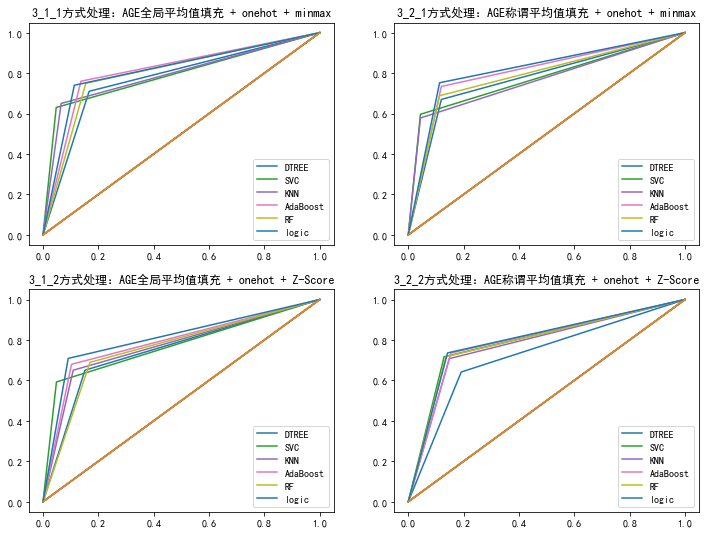

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, roc_auc_score

# plt.figure(figsize=(5,4),dpi=150)
# fig, axes = plt.subplots(2, 2,figsize = (12,9),dpi=150)
fig, axes = plt.subplots(2, 2,figsize = (12,9))

data_type = {0:'3_1_1方式处理：AGE全局平均值填充 + onehot + minmax',
            1:'3_2_1方式处理：AGE称谓平均值填充 + onehot + minmax',
            2:'3_1_2方式处理：AGE全局平均值填充 + onehot + Z-Score',
            3:'3_2_2方式处理：AGE称谓平均值填充 + onehot + Z-Score'}
score_df = []
for i,l in enumerate(train_test_data_list):
    train_x = l[0]
    test_x = l[1]
    train_y = l[2]
    test_y = l[3]
    print()
    print(data_type[i])
    print()
    ax = axes[i//2,i%2]
    
    for name,content in model_df.iterrows():
        model = content.model
        model.fit(train_x,train_y)
        print('{} 模型最佳得分 {:.2%}'.format(name,model.best_score_))
        print('{} 模型最佳参数 {}'.format(name,model.best_params_))

        best_model = model.best_estimator_

        Kscore = np.mean(cross_val_score(best_model, train_x, train_y, cv=10))
        print('{} 模型K折交叉验证得分 {:.2%}'.format(name,Kscore))



        pred_y = best_model.predict(test_x)

        fpr, tpr, thresholds = roc_curve(test_y, pred_y)
        # auc面积
        roc_auc = roc_auc_score(test_y, pred_y)
        
        score_df.append([
            name,
            model,
            data_type[i],
            model.best_score_,
            model.best_params_,
            round(Kscore*100,2),
            roc_auc,
        ])
        
        ax.plot(fpr, tpr,label=name)
        ax.plot(fpr, fpr, linestyle = '-' )
    
        ax.set_title(data_type[i])

        ax.legend()
        
plt.savefig('3.jpg')
plt.show()

score_df = pd.DataFrame(score_df,columns=['name','model','处理方式','最佳得分','最佳参数','K折交叉验证得分','最佳模型AUC面积'])

In [46]:
score_df.sort_values(['name','最佳模型AUC面积'])

,name,model,处理方式,最佳得分,最佳参数,K折交叉验证得分,最佳模型AUC面积
15,AdaBoost,"GridSearchCV(estimator=AdaBoostClassifier(),\n...",3_1_2方式处理：AGE全局平均值填充 + onehot + Z-Score,0.804181,{'n_estimators': 40},80.90,0.788291
21,AdaBoost,"GridSearchCV(estimator=AdaBoostClassifier(),\n...",3_2_2方式处理：AGE称谓平均值填充 + onehot + Z-Score,0.813884,{'n_estimators': 40},81.39,0.790764
9,AdaBoost,"GridSearchCV(estimator=AdaBoostClassifier(),\n...",3_2_1方式处理：AGE称谓平均值填充 + onehot + minmax,0.813858,{'n_estimators': 43},82.35,0.807224
3,AdaBoost,"GridSearchCV(estimator=AdaBoostClassifier(),\n...",3_1_1方式处理：AGE全局平均值填充 + onehot + minmax,0.807368,{'n_estimators': 41},80.56,0.811548
18,DTREE,GridSearchCV(estimator=DecisionTreeClassifier(...,3_2_2方式处理：AGE称谓平均值填充 + onehot + Z-Score,0.797781,{'criterion': 'entropy'},78.79,0.725076
12,DTREE,GridSearchCV(estimator=DecisionTreeClassifier(...,3_1_2方式处理：AGE全局平均值填充 + onehot + Z-Score,0.775239,{'criterion': 'entropy'},76.42,0.749485
0,DTREE,GridSearchCV(estimator=DecisionTreeClassifier(...,3_1_1方式处理：AGE全局平均值填充 + onehot + minmax,0.759123,{'criterion': 'entropy'},78.31,0.771667
6,DTREE,GridSearchCV(estimator=DecisionTreeClassifier(...,3_2_1方式处理：AGE称谓平均值填充 + onehot + minmax,0.785006,{'criterion': 'gini'},77.22,0.775114
8,KNN,"GridSearchCV(estimator=KNeighborsClassifier(),...",3_2_1方式处理：AGE称谓平均值填充 + onehot + minmax,0.820258,{'n_neighbors': 4},82.35,0.766978
14,KNN,"GridSearchCV(estimator=KNeighborsClassifier(),...",3_1_2方式处理：AGE全局平均值填充 + onehot + Z-Score,0.831458,{'n_neighbors': 5},82.52,0.770697


In [47]:
best_model = score_df.sort_values(['最佳模型AUC面积'])['model'].tolist()[-1].best_estimator_

In [48]:
predictions = best_model.predict(data_test_features_scaler_3_2_2)

output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
